In [1]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
 
%matplotlib inline

In [2]:
dataset = pd.read_csv("dataset/Preproccessed dataset.csv").dropna(axis = 1)

In [3]:
dataset = dataset.drop(columns = dataset.columns[0], axis = 1)
dataset.head()

,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,acidity,...,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Disease
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


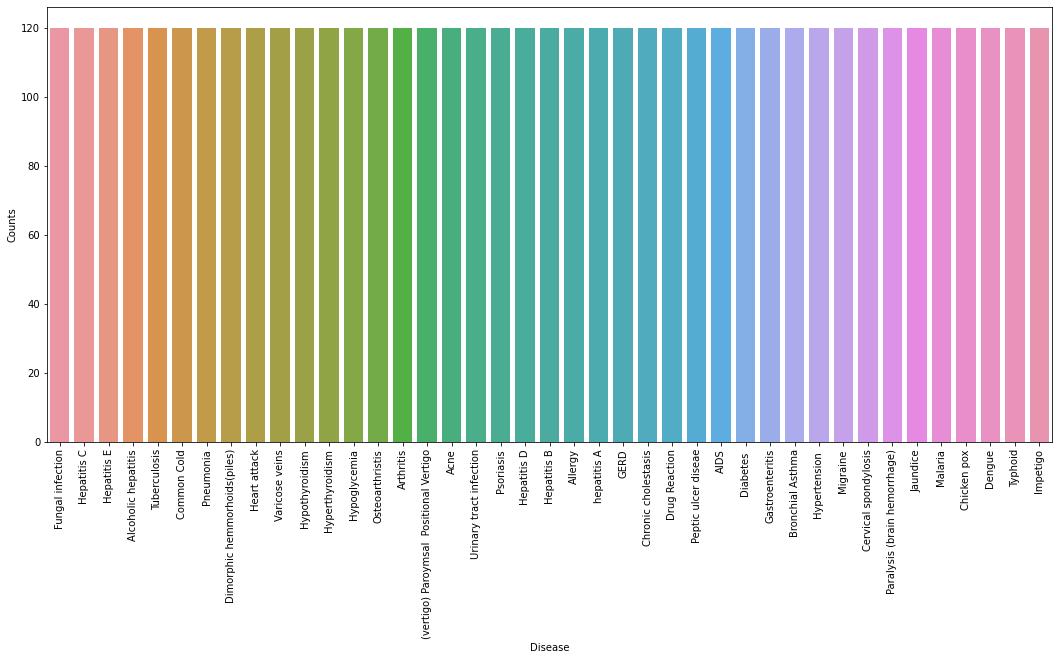

In [4]:
#checking if dataset is balanced or not

disease_counts = dataset["Disease"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})
 
plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

In [5]:
#encoding diseases

LE = LabelEncoder()

dataset["Disease"] = LE.fit_transform(dataset["Disease"])

In [6]:
# splitting dataset into training and testing sets

x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 24)


In [7]:
# k-fold validation

def cross_score(esti,x,y):
    return accuracy_score(y,esti.predict(x))

print("model name : SVM")
scores = cross_val_score(SVC(), x, y, cv = 10,n_jobs = -1, scoring = cross_score)
print(scores)
print("Mean Score: ", np.mean(scores))

print("--"*15)

print("model name : Naive Bayes")
scores1 = cross_val_score(GaussianNB(), x, y, cv = 10, n_jobs = -1, scoring = cross_score)
print(scores1)
print("Mean Score: ", np.mean(scores1))

print("--"*15)

print("model name : Random Forest")
scores2 = cross_val_score(RandomForestClassifier(random_state = 18), x, y, cv = 10, n_jobs = -1, scoring = cross_score)
print(scores2)
print("Mean Score: ", np.mean(scores2))

print("--"*15)

print("model name : K-Nearest Neighbors")
scores3 = cross_val_score(KNeighborsClassifier(5), x, y, cv = 10, n_jobs = -1, scoring = cross_score)
print(scores3)
print("Mean Score: ", np.mean(scores3))


model name : SVM
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score:  1.0
------------------------------
model name : Naive Bayes
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score:  1.0
------------------------------
model name : Random Forest
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score:  1.0
------------------------------
model name : K-Nearest Neighbors
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score:  1.0


Accuracy - SVM classifier
accuracy on train data :  100.0
accuracy on test data :  100.0


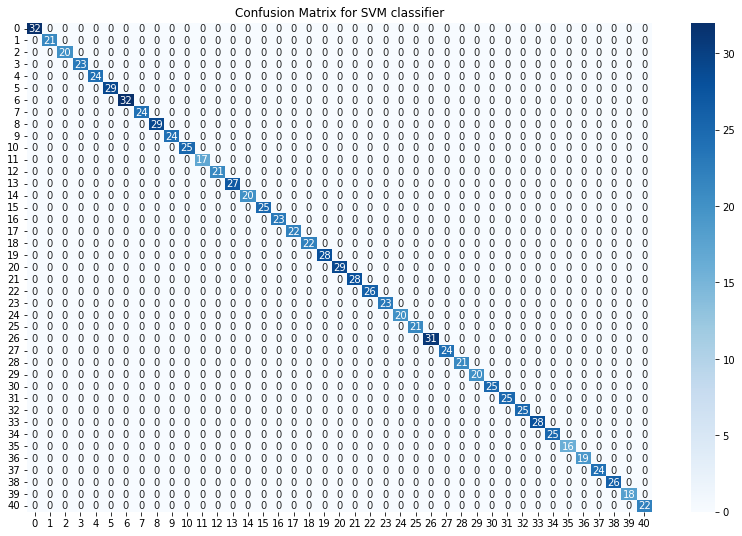

In [8]:
#training and testing SVM classifier

svm = SVC()
svm.fit(x_train, y_train)

pred_svm = svm.predict(x_test)
print("Accuracy - SVM classifier")
print("accuracy on train data : ", accuracy_score(y_train, svm.predict(x_train))*100)
print("accuracy on test data : ", accuracy_score(y_test,pred_svm )*100)

confu_mat = confusion_matrix(y_test, pred_svm)
plt.figure(figsize=(14,9))
sns.heatmap(confu_mat, annot = True, cmap = "Blues")
plt.title("Confusion Matrix for SVM classifier")
plt.show()

Accuracy - Naive Bayes
Accuracy on train data :  100.0
Accuracy on test data :  100.0


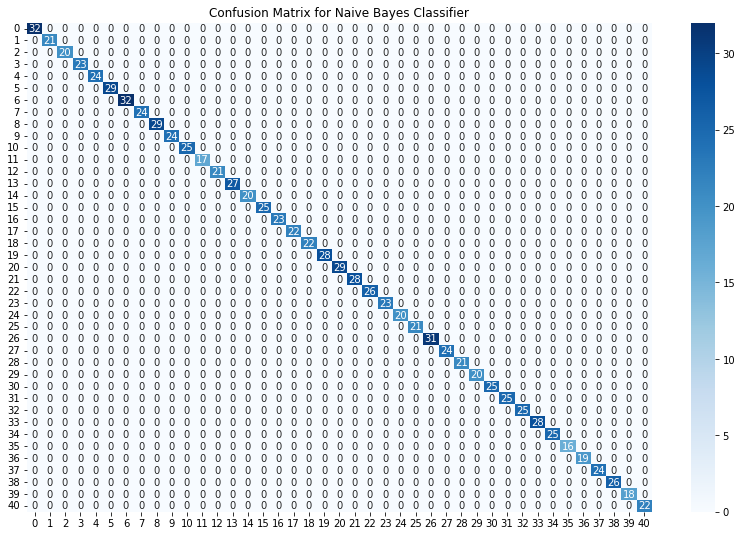

In [9]:
#training and testing Gaussian Naive Bayes

GNB = GaussianNB()
GNB.fit(x_train, y_train)

pred_gnb = GNB.predict(x_test)

print("Accuracy - Naive Bayes")
print("Accuracy on train data : ", accuracy_score(y_train, GNB.predict(x_train))*100)
print("Accuracy on test data : ", accuracy_score(y_test,pred_gnb)*100)

confu_mat1 = confusion_matrix(y_test, pred_gnb)
plt.figure(figsize = (14,9))
sns.heatmap(confu_mat1, annot = True, cmap = "Blues")
plt.title("Confusion Matrix for Naive Bayes Classifier")
plt.show()

Accuracy - Random Forest Classifier
Accuracy on train data :  100.0
Accuracy on test data :  100.0


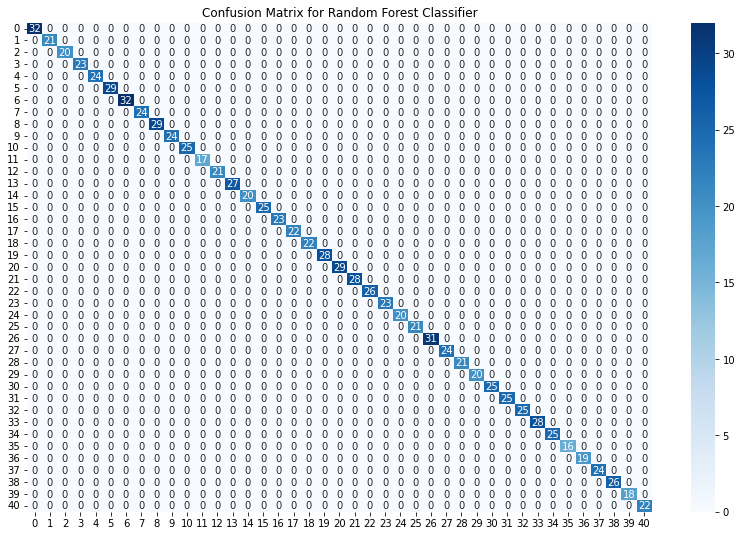

In [10]:
#training and testing Random Forest

RF = RandomForestClassifier(random_state = 18)
RF.fit(x_train, y_train)

pred_rf= RF.predict(x_test)

print("Accuracy - Random Forest Classifier")
print("Accuracy on train data : ", accuracy_score(y_train, RF.predict(x_train))*100)
print("Accuracy on test data : ", accuracy_score(y_test,pred_rf)*100)

confu_mat1 = confusion_matrix(y_test, pred_rf)
plt.figure(figsize = (14,9))
sns.heatmap(confu_mat1, annot = True, cmap = "Blues")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

Accuracy - K-Nearest Neighbors
Accuracy on train data :  100.0
Accuracy on test data :  100.0


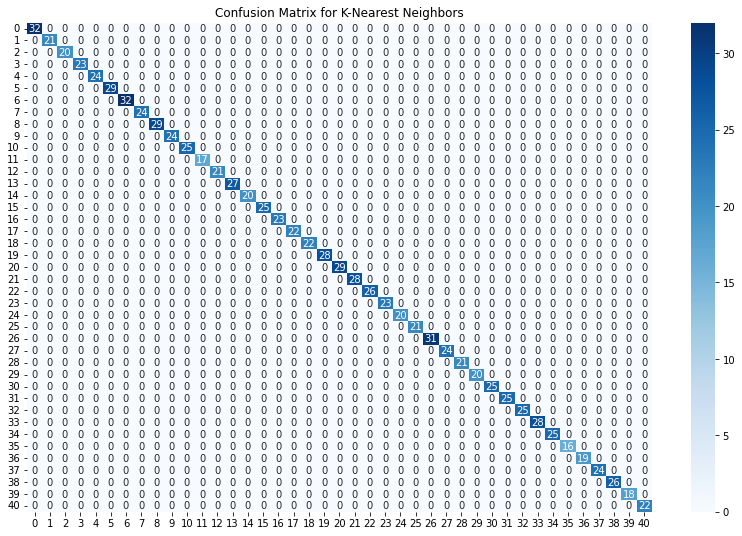

In [11]:
#training and testing K-Nearest Neighbors

knn = KNeighborsClassifier(5)
knn.fit(x_train, y_train)

pred_knn = knn.predict(x_test)

print("Accuracy - K-Nearest Neighbors")
print("Accuracy on train data : ", accuracy_score(y_train, knn.predict(x_train))*100)
print("Accuracy on test data : ", accuracy_score(y_test,pred_knn)*100)

confu_mat1 = confusion_matrix(y_test, pred_knn)
plt.figure(figsize = (14,9))
sns.heatmap(confu_mat1, annot = True, cmap = "Blues")
plt.title("Confusion Matrix for K-Nearest Neighbors")
plt.show()

In [12]:
# testing our proposed model

test_data = pd.read_csv("Testing.csv").dropna(axis = 1)
test_data = test_data.drop(columns = test_data.columns[0], axis = 1)
test_data


,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,acidity,...,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Disease
0,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Peptic ulcer diseae
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Diabetes
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gastroenteritis
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bronchial Asthma


In [13]:
test_x = test_data.iloc[:,:-1]
test_y = LE.transform(test_data.iloc[:,-1])

svm_pred = svm.predict(test_x)
gnb_pred = GNB.predict(test_x)
rf_pred = RF.predict(test_x)
knn_pred = knn.predict(test_x)

Accuracy on Test data by Proposed Model :  100.0


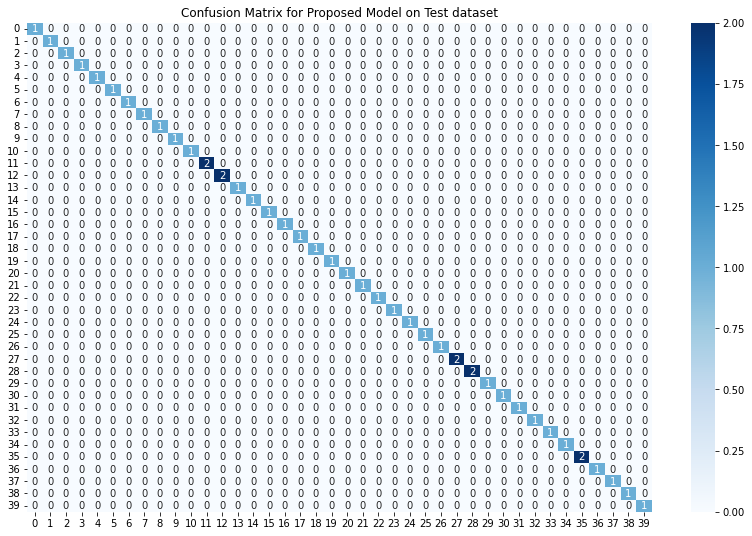

In [14]:
final_preds = [mode([i,j,k,l])[0][0] for i,j,k,l in zip(svm_pred, gnb_pred, rf_pred, knn_pred)]
print("Accuracy on Test data by Proposed Model : ", accuracy_score(test_y, final_preds)*100)

final_CM = confusion_matrix(test_y, final_preds)
plt.figure(figsize = (14,9))
sns.heatmap(final_CM, annot = True, cmap= "Blues")
plt.title("Confusion Matrix for Proposed Model on Test dataset")
plt.show()

In [15]:
symptoms = x.columns.values
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i for i in value.split("_")])
    symptom_index[symptom] = index
 
data_dict = {
    "symptom_index":symptom_index,
    "predictions_classes":LE.classes_
}

In [16]:
def predictDisease(symptoms):
    symptoms = symptoms.split(",")
     
    # creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1
         
    # reshaping the input data and converting it
    # into suitable format for model predictions
    input_data = np.array(input_data).reshape(1,-1)
     
    # generating individual outputs
    rf_prediction = data_dict["predictions_classes"][RF.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][GNB.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][svm.predict(input_data)[0]]
    knn_prediction = data_dict["predictions_classes"][knn.predict(input_data)[0]]
     
    # making final prediction by taking mode of all predictions
    final_prediction = mode([rf_prediction, nb_prediction, svm_prediction, knn_prediction])[0][0]
    print("Random forest : ",rf_prediction,"\nnaive bayes : " , nb_prediction,"\nSVM : ", svm_prediction,"\nKNN : ", knn_prediction)
    
    predictions = {
        
        "final_prediction":final_prediction
    }
    return final_prediction
 
# Testing the function
print("predicted disease : " , predictDisease("itching, skin rash, nodal skin eruptions"))

Random forest :  Fungal infection 
naive bayes :  Fungal infection 
SVM :  Fungal infection 
KNN :  Fungal infection
predicted disease :  Fungal infection


C:\Users\SAGAR\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\SAGAR\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\SAGAR\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\SAGAR\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [18]:
io = " chills, joint pain, high fever, headache, nausea, loss of appetite"
print("predicted disease : ", predictDisease(io))

Random forest :  Hepatitis D 
naive bayes :  Dengue 
SVM :  Malaria 
KNN :  Malaria
predicted disease :  Malaria


C:\Users\SAGAR\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\SAGAR\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\SAGAR\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\SAGAR\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
